In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sovitrath_diabetic_retinopathy_224x224_gaussian_filtered_path = kagglehub.dataset_download('sovitrath/diabetic-retinopathy-224x224-gaussian-filtered')

print('Data source import complete.')


 71%|███████   | 303M/427M [00:15<00:06, 20.2MB/s]


KeyboardInterrupt: 

## Diabetic Retinopathy

In this kernel we wil use Convolutional Neural Networks to predict the probability that wether a person is suffering from DIabteic Retinopathy or not using the sample images provided to us in the dataset.

**Diabetic retinopathy** is a diabetes complication that affects eyes. It's caused by damage to the blood vessels of the light-sensitive tissue at the back of the eye (retina). At first, diabetic retinopathy may cause no symptoms or only mild vision problems.

![image.png](attachment:image.png)

You might not have symptoms in the early stages of diabetic retinopathy. As the condition progresses, diabetic retinopathy symptoms may include:

* Spots or dark strings floating in your vision (floaters)
* Blurred vision
* Fluctuating vision
* Impaired color vision
* Dark or empty areas in your vision
* Vision loss
* Diabetic retinopathy usually affects both eyes.

**Diabetic retinopathy can lead to other serious eye conditions:**

1. Diabetic macular edema (DME). Over time, about half of people with diabetic retinopathy will develop DME. DME happens when blood vessels in the retina leak fluid, causing swelling in the macula (a part of the retina). If you have DME, your vision will become blurry because of the extra fluid in your macula.  

2. Neovascular glaucoma. Diabetic retinopathy can cause abnormal blood vessels to grow out of the retina and block fluid from draining out of the eye. This causes a type of glaucoma.

Diabetic retinopathy is caused by high blood sugar due to diabetes. Over time, having too much sugar in your blood can damage your retina — the part of your eye that detects light and sends signals to your brain through a nerve in the back of your eye (optic nerve).  



Diabetes damages blood vessels all over the body. The damage to your eyes starts when sugar blocks the tiny blood vessels that go to your retina, causing them to leak fluid or bleed. To make up for these blocked blood vessels, your eyes then grow new blood vessels that don’t work well. These new blood vessels can leak or bleed easily.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Using the Image Data Generator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/content/drive/MyDrive/ddrDataset/gaussian_filtered_images/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('/content/drive/MyDrive/ddrDataset/gaussian_filtered_images/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


## Now, let us try Efficient Net

Google recently published both a very exciting paper and source code for a newly designed CNN (convolutional neural network) called EfficientNet, that set new records for both accuracy and computational efficiency.
This was not a minor improvement but rather an accuracy improvement of up to 6% while on the order of 5–10x more efficient than most current CNN’s.

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Using EfficientNet for Transfer Learning

In [ ]:
!pip install -q efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
import efficientnet.tfkeras as efn

## Defining the learning rate scheduler

In [ ]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [ ]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])

model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])


16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
history=model.fit(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=20,verbose=1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 2396s 24s/step - acc: 0.6019 - loss: 1.2265 - val_acc: 0.5869 - val_loss: 1.0973 - learning_rate: 1.0000e-04
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 644ms/step - acc: 0.7198 - loss: 0.7743 - val_acc: 0.6183 - val_loss: 0.9828 - learning_rate: 1.0000e-04
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 651ms/step - acc: 0.7585 - loss: 0.6481 - val_acc: 0.7018 - val_loss: 0.7778 - learning_rate: 1.0000e-04
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 632ms/step - acc: 0.7620 - loss: 0.6242 - val_acc: 0.7497 - val_loss: 0.6931 - learning_rate: 1.0000e-04
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 71s 738ms/step - acc: 0.7732 - loss: 0.6079 - val_acc: 0.7456 - val_loss: 0.6851 - learning_rate: 1.0000e-04
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 74s 645ms/step - acc: 0.8140 - loss: 0.4973 - val_acc: 0.7661 - val_loss: 0.5888 - learning_rate: 1.0000e-04
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 62s 631ms/step - acc: 0.8291 - loss: 0.4671 - val_acc: 0.7907 - val_loss: 0.5246 - learning

## We got smoother validation and training curves.

In [12]:
import matplotlib.pyplot as plt

In [13]:
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

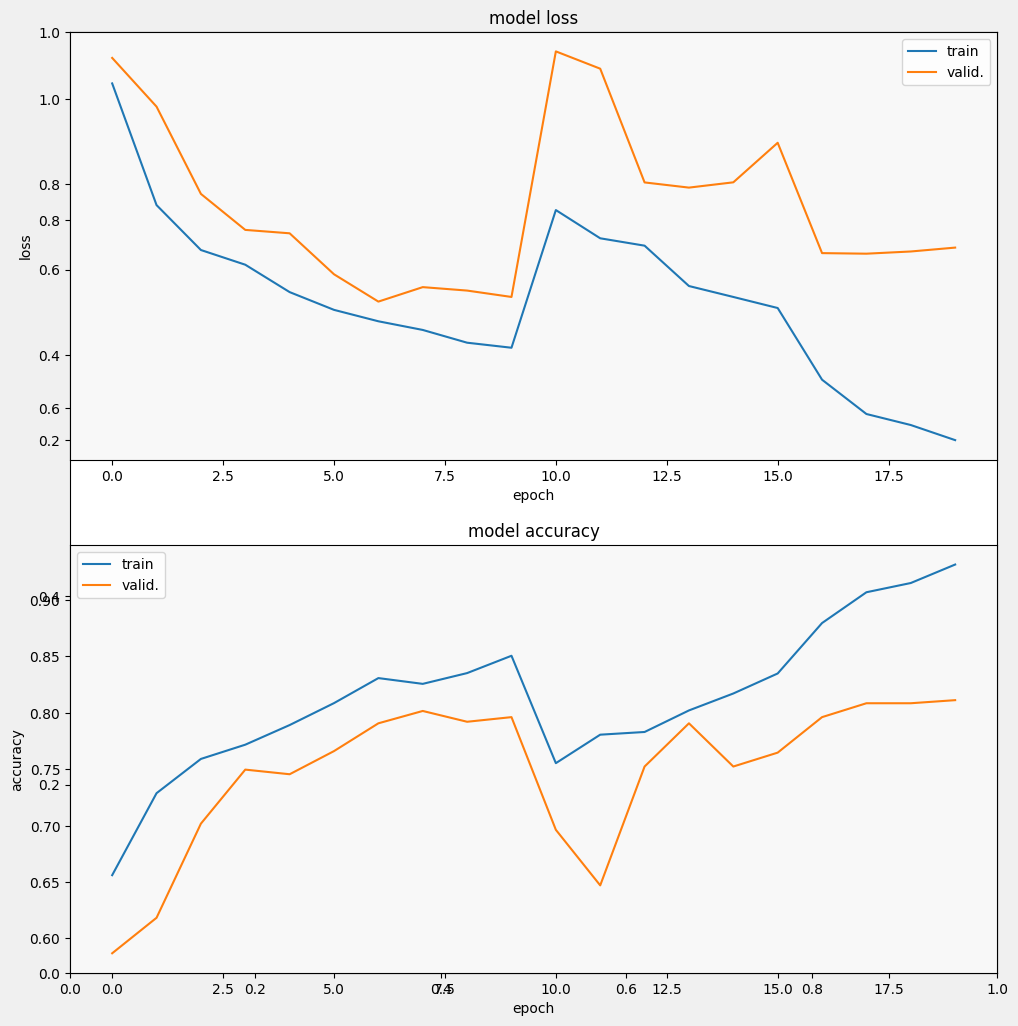

In [14]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss', 211)
display_training_curves(
    history.history['acc'],
    history.history['val_acc'],
    'accuracy', 212)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnet-b0 (Functional)         │ (None, 7, 7, 1280)          │       4,049,564 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         313,605 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,005,477 (49.61 MB)

 Trainable params: 4,321,153 (16.48 MB)

 Non-trainable params: 42,016 (164.12 KB)

 Optimizer params: 8,642,308 (32.97 MB)

In [16]:
import numpy as np

In [17]:
predictions = model.predict(valid_data)

# Interpret the predictions (e.g., get the class with the highest probability)
predicted_class = np.argmax(predictions, axis=1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 764ms/step


In [18]:
predicted_class

array([0, 2, 1, 1, 3, 2, 1, 1, 3, 2, 0, 0, 3, 3, 2, 3, 2, 2, 2, 2, 0, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 3, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 3, 1, 0, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 4, 2,
       2, 1, 1, 2, 1, 1, 1, 0, 3, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 4, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 4, 3, 1, 1, 3, 0, 2,
       1, 4, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 1, 0, 1, 0, 3, 2, 2, 1,
       3, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 3, 2, 2, 0, 2, 2, 0, 2,
       1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1,

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_path = '/content/0ad7f631dedb.png'  # Replace with the actual path
img = image.load_img(img_path, target_size=(224, 224))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values

# Make the prediction
prediction = model.predict(img_array)

# Interpret the prediction
predicted_class = np.argmax(prediction, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [21]:
if predicted_class[0]==0:
  print("Mild")
if predicted_class[0]==1:
  print("Moderate")
if predicted_class[0]==2:
  print("No_DR")
if predicted_class[0]==3:
  print("profilerate_DR")
if predicted_class[0]==4:
  print("Severe")

Moderate


In [22]:
model.save('model.h5')  # For TensorFlow/Keras models
